### 복습
1. drinks.csv 파일로드
2. 결측치 확인
3. 결측치 데이터를 'OT'로 대체
4. 컬럼의 이름을 변경 -> ['국가','맥주소비량','위스키소비량','와인소비량','도수','대륙']
5. 대륙별 맥주 소비량의 평균, 최소값, 최대값, 합계 출력
6. 도수 컬럼의 전체의 평균보다 대륙별 도수의 평균이 높은 대륙 출력

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\82105\AppData\Local\Temp\ipykernel_63620\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
drinks=pd.read_csv("../csv/drinks.csv")

In [3]:
# 결측치를 확인
drinks.info() # continent 값 170개로 결측치 확인가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
# 결측치의 개수를 출력
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [7]:
# continent의 데이터 중 결측치인 데이터만 확인
flag=drinks['continent'].isna()
drinks.loc[flag, ]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [9]:
# 결측치가 포함된 데이터프레임을 확인
flag2=drinks.isna().any(axis=1)
drinks.loc[flag2, ]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [11]:
# 결측치 데이터(cuntinent)를 'OT'로 대체
# fillna('OT')

drinks['continent']=drinks['continent'].fillna('OT')

In [12]:
# 결측치 잘 채워졌는지 확인
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [13]:
# 컬럼의 이름을 변경
drinks.columns = ['국가','맥주소비량','위스키소비량','와인소비량','도수','대륙']

In [14]:
drinks.head(1)

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙
0,Afghanistan,0,0,0,0.0,AS


In [17]:
# case1
group_data=drinks[['맥주소비량','대륙']].groupby('대륙').agg(['mean','min','max','sum'])

In [16]:
# case2
drinks[['맥주소비량','대륙']].groupby('대륙').describe()

맥주소비량                                                           
   count        mean        std   min     25%    50%     75%    max
대륙                                                                 
AF  53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0
AS  44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0
EU  45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0
OC  16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0
OT  23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0
SA  12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0

In [18]:
group_data

맥주소비량               
          mean min  max   sum
대륙                           
AF   61.471698   0  376  3258
AS   37.045455   0  247  1630
EU  193.777778   0  361  8720
OC   89.687500   0  306  1435
OT  145.434783   1  285  3345
SA  175.083333  93  333  2101

In [19]:
group_data['맥주소비량']['mean']

대륙
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: mean, dtype: float64

In [22]:
# 전체 데이터에서 도수의 평균
mean_data=drinks['도수'].mean()

In [23]:
mean_data

4.717098445595855

In [24]:
group_data2=drinks[['대륙','도수']].groupby('대륙').mean()

In [27]:
flag3=group_data2['도수'] > mean_data

In [28]:
group_data2.loc[flag3, ]

,도수
대륙,
EU,8.617778
OT,5.995652
SA,6.308333


In [29]:
# 과연 우리나라의 총 술소비량은 몇 위인가?
# 그래프 표시
# 총 술 소비량이 가장 많은 국가는 어디인가?

# 총 술 소비량 컬럼을 생성
# 맥주소비량 + 위스키소비량 + 와인소비량
drinks['총술소비량']=drinks['맥주소비량']+drinks['위스키소비량']+drinks['와인소비량']

drinks.head(3)

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙,총술소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39


In [31]:
# 총술소비량을 기준으로 내림차순 정렬
drinks.sort_values('총술소비량',ascending=False, inplace=True)

In [32]:
# 인덱스 초기화(기존의 인덱스는 제거)
drinks.reset_index(drop=True, inplace=True)

In [34]:
# 우리나라의 순위
flag=drinks['국가']=='South Korea'
drinks.loc[flag, ].index[0]+1

99

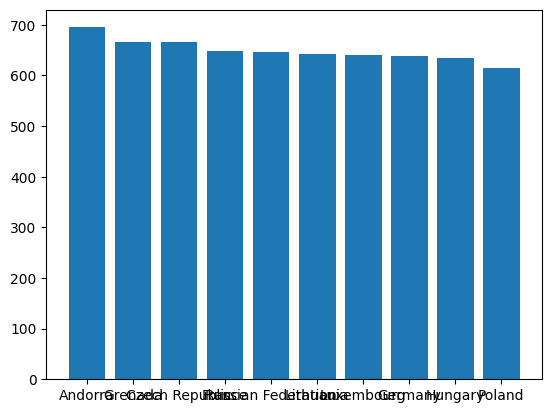

In [35]:
# 총술소비량 상위 10위까지의 데이터를 시각화
x=drinks['국가'].head(10)
y=drinks['총술소비량'].head(10)

plt.bar(x, y)
plt.show()

c:\Users\82105\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\82105\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\82105\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


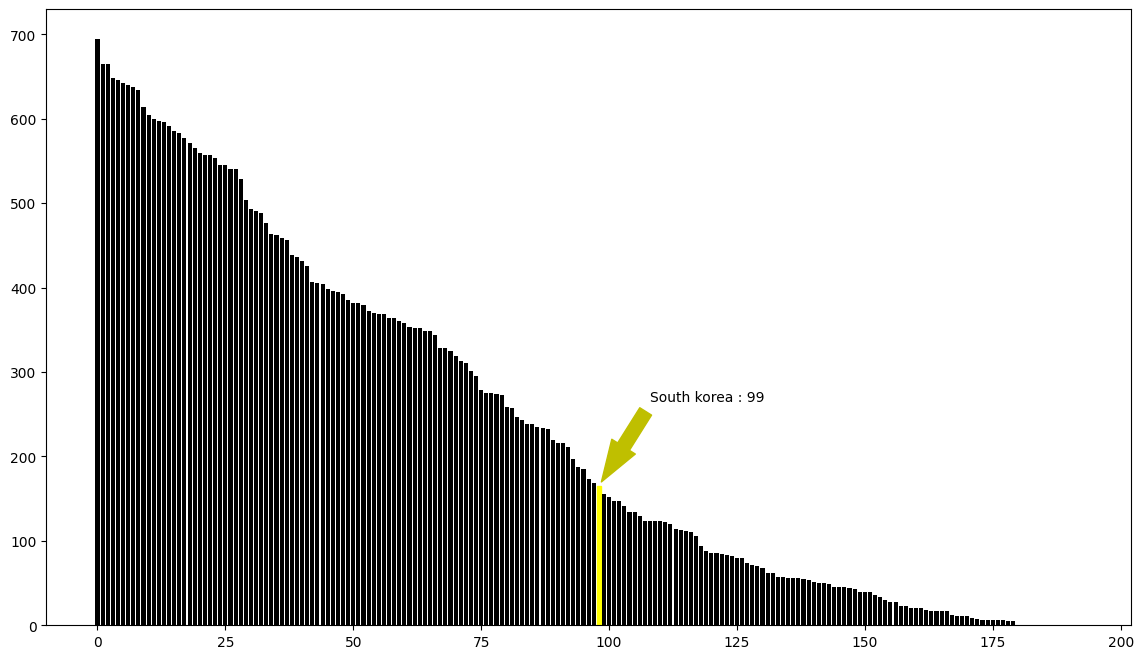

In [45]:
# 총술소비량 막대 그래프 표시
# 우리나라의 막대의 색상을 변경하고 주석달기
x=drinks.index
y=drinks['총술소비량']

# south korea의 인덱스 값을 추출
korea_index=drinks.loc[drinks['국가']=='South Korea', ].index[0]
# south korea의 총술소비량 추출
korea_total=drinks.loc[drinks['국가']=='South Korea', '총술소비량']

# 그래프 사이즈 변경
plt.figure(figsize=(14,8))

bar_list=plt.bar(x,y, color='black')

# 한국의 막대를 다른 색으로 변경
bar_list[korea_index].set_color('yellow')

# 그래프에 주석설정
plt.annotate(f'South korea : {korea_index+1}', xy=(korea_index, korea_total),xytext=(korea_index+10, korea_total+100),arrowprops=dict(facecolor='y', edgecolor='y', headwidth=20, headlength=30, width=10, shrink=0.05))
# facecolor= 화살표내부의 색을 지정, edge color=화살표 외각의 선의 색을 지정, headwidth=화살표 머리의 너비, headlength=화살표머리의 길이, width=화살표 꼬리의 너비, shrink=화살표와 주석 사이의 거리

plt.show()

In [50]:
# 도수 상위 10개 나라 그래프로 출력
drinks2=drinks.sort_values('도수',ascending=False, inplace=True)

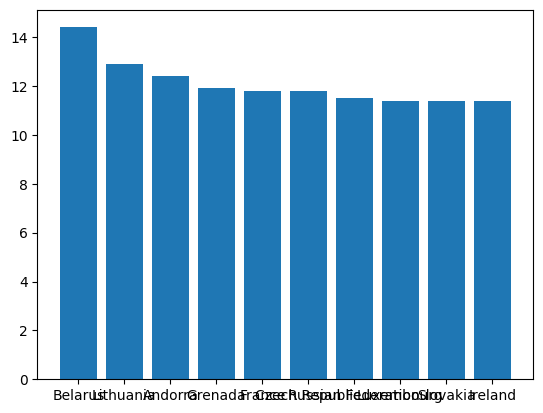

In [51]:
x=drinks['국가'].head(10)
y=drinks['도수'].head(10)

plt.bar(x, y)
plt.show()

In [53]:
# 우리나라는 과연 얼마나 술을 독하게 먹는가?
drinks.sort_values('도수',ascending=False, inplace=True)

In [55]:
drinks.reset_index(drop=True, inplace=True)

c:\Users\82105\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\82105\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\82105\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


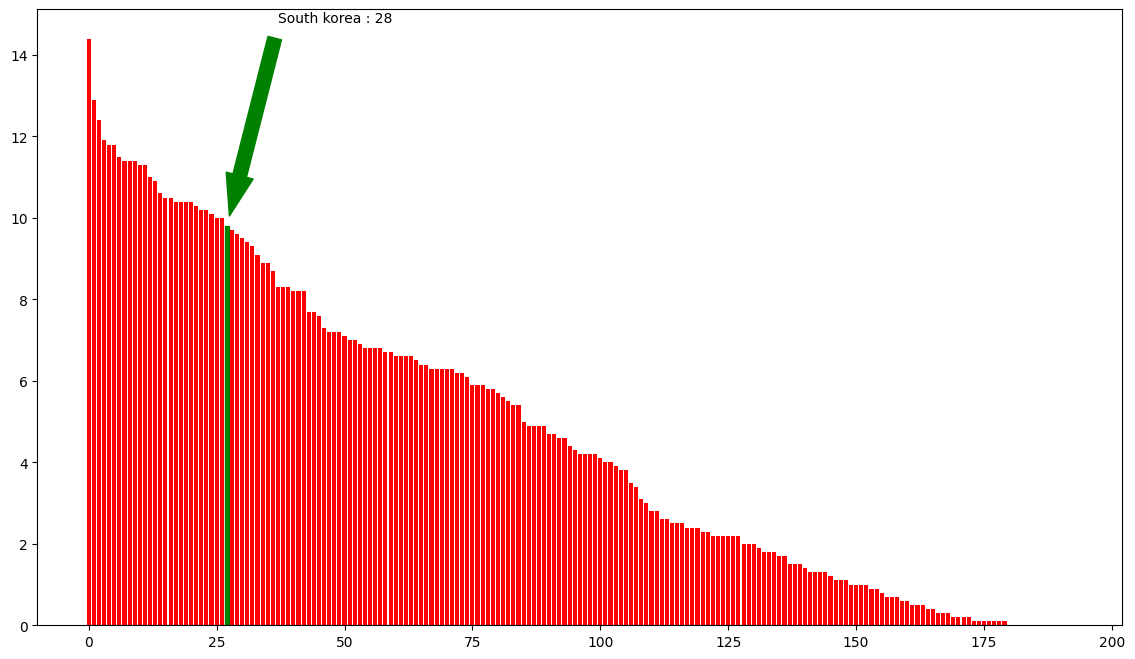

In [58]:
# 총술소비량 막대 그래프 표시
# 우리나라의 막대의 색상을 변경하고 주석달기
x=drinks.index
y=drinks['도수']

# south korea의 인덱스 값을 추출
korea_index=drinks.loc[drinks['국가']=='South Korea', ].index[0]
# south korea의 총술소비량 추출
korea_total=drinks.loc[drinks['국가']=='South Korea', '도수']

# 그래프 사이즈 변경
plt.figure(figsize=(14,8))

bar_list=plt.bar(x,y, color='red')

# 한국의 막대를 다른 색으로 변경
bar_list[korea_index].set_color('green')

# 그래프에 주석설정
plt.annotate(f'South korea : {korea_index+1}', xy=(korea_index, korea_total),xytext=(korea_index+10, korea_total+5),arrowprops=dict(facecolor='g', edgecolor='g', headwidth=20, headlength=30, width=10, shrink=0.05))
# facecolor= 화살표내부의 색을 지정, edge color=화살표 외각의 선의 색을 지정, headwidth=화살표 머리의 너비, headlength=화살표머리의 길이, width=화살표 꼬리의 너비, shrink=화살표와 주석 사이의 거리

plt.show()